# Module 3B - Working with Non_Sationary m_t.

## Session 8 Questions

In [1]:
import pandas as pd 
import numpy as np

In [2]:
b3_data = pd.read_csv("Module3_data\module3b_data_Simulated_Nonstationary.CSV")
b3_data.head()

,dateid01,dateid,em,en,m,n,x,y,z
0,1973-07-01,1973-07-31 23:59:59.999,0.000000,0.000000,0.0,0,39.575176,15.113905,727.921639
1,1973-08-01,1973-08-31 23:59:59.999,0.211908,-1.455569,1.5,-2,38.962416,16.584622,729.480429
2,1973-09-01,1973-09-30 23:59:59.999,1.633812,0.379432,3.0,-4,37.219141,17.310910,727.280262
3,1973-10-01,1973-10-31 23:59:59.999,2.398119,0.342120,4.5,-6,35.104100,17.691245,729.819402
4,1973-11-01,1973-11-30 23:59:59.999,-0.023755,-1.083531,6.0,-8,33.766806,16.803657,727.948215


### Identifying Non-Stationarity

In [3]:
# generate mt
mt = []
emt = np.array(b3_data['em'])
mt.append(0) #append the first observation
for i in range(1,len(emt)):
    mt.append(1.5 + mt[i-1] + emt[i])

In [4]:
#generate nt
# generate mt
nt = []
ent = np.array(b3_data['en'])
nt.append(0) #append the first observation
for i in range(1,len(ent)):
    nt.append(-2 + nt[i-1] + ent[i])

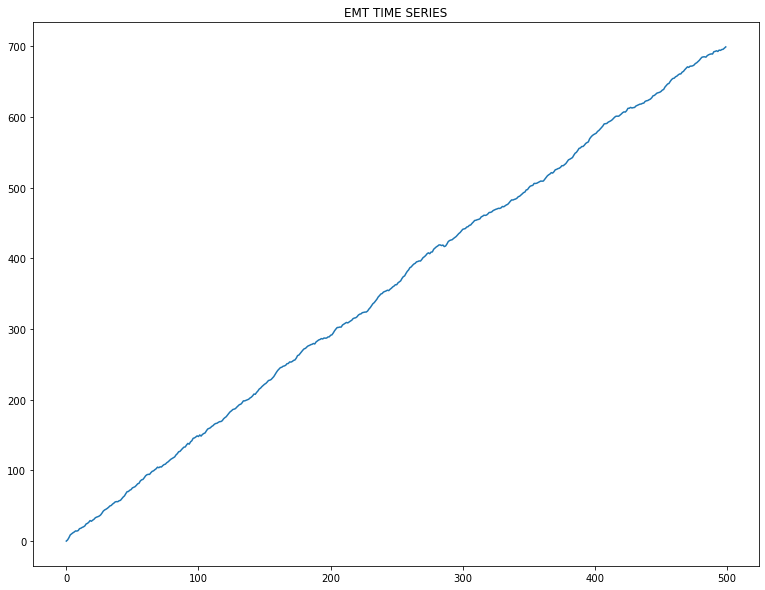

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.title( "EMT TIME SERIES")
plt.plot(mt)

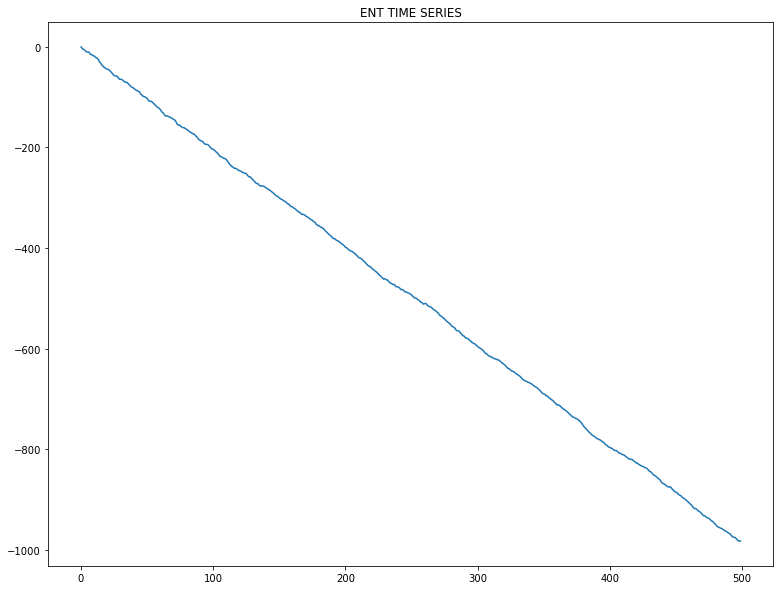

In [6]:
plt.figure(figsize=(13,10))
plt.title( "ENT TIME SERIES")
plt.plot(nt)

#### Question 3.36

These two series, m and n, are stationary:
**False**

### Non_Stationary Data

#### Question 3.37 

Observing the correlogram for each series, at which lag does the ACF become statistically insignificant? Use a 5 percent level of significance to decide.

**Answer:** They do not die out
We can in the LJunbox that the pvalue is always under 0.001, the impact of 20th lag is still relevant.Same goes for the 100 lag.

In [11]:
import statsmodels as sm
sm.stats..diagnostic.acorr_ljungbox(mt, lags=100, return_df=True)

SyntaxError: invalid syntax (Temp/ipykernel_23016/4254272967.py, line 2)

In [ ]:
sm.stats.acorr_ljungbox(nt, lags=20, return_df=True)

,lb_stat,lb_pvalue
1,496.921362,4.444510e-110
2,988.779931,1.946104e-215
3,1475.574752,0.000000e+00
4,1957.332475,0.000000e+00
5,2434.091858,0.000000e+00
6,2905.840194,0.000000e+00
7,3372.560162,0.000000e+00
8,3834.303527,0.000000e+00
9,4291.094751,0.000000e+00
10,4742.937724,0.000000e+00


#### Question 3.38

Estimate an AR(1) model for m and then for n 

**Answer:** The coeficent for both M and N is ***1.000***

In [ ]:
from datetime import datetime
import dateutil.parser
# make mt a time series
m_t = pd.DataFrame(np.array(mt), columns={'mt'})
m_t.index = pd.date_range("1973-08-01", periods = len(mt), freq = "M")
#m_t = m_t[m_t.index > dateutil.parser.parse("2000-01-01")]
print(m_t.tail())

#make nt a time series
n_t = pd.DataFrame(np.array(nt),columns={'nt'})
n_t.index = pd.date_range("1973-08-01", periods = len(nt), freq = "M")
#m_t = m_t[m_t.index > dateutil.parser.parse("2000-01-01")]
print(n_t.tail())

                    mt
2014-11-30  694.001964
2014-12-31  695.207328
2015-01-31  695.575044
2015-02-28  697.171773
2015-03-31  698.936654
                    nt
2014-11-30 -975.860695
2014-12-31 -978.481381
2015-01-31 -981.596692
2015-02-28 -982.341694
2015-03-31 -982.708460


In [ ]:
#MT AR(1)
ar1_mt = sm.tsa.arima.ARIMA(m_t,trend='c', order = (1,0,0))
ar1_mt_fit = ar1_mt.fit()
print(ar1_mt_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -984.516
Date:                Wed, 06 Oct 2021   AIC                           1975.032
Time:                        10:43:49   BIC                           1987.675
Sample:                    08-31-1973   HQIC                          1979.993
                         - 03-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        359.6775    476.665      0.755      0.451    -574.569    1293.924
ar.L1          1.0000      0.000   2609.629      0.000       0.999       1.001
sigma2         2.9415      0.262     11.239      0.0

In [ ]:
# NT AR(1)
ar1_nt = sm.tsa.arima.ARIMA(n_t,trend='c', order = (1,0,0))
ar1_nt_fit = ar1_nt.fit()
print(ar1_nt_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1112.850
Date:                Wed, 06 Oct 2021   AIC                           2231.699
Time:                        10:44:23   BIC                           2244.343
Sample:                    08-31-1973   HQIC                          2236.661
                         - 03-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -494.8114    507.390     -0.975      0.329   -1489.278     499.655
ar.L1          1.0000      0.000   2863.723      0.000       0.999       1.001
sigma2         4.9132      0.519      9.471      0.0

#### Question 3.39

Run a regression of M on N

**Answer**: 
Looking below we have a great R^2 **Good Fit**

Also the **coeffient for n is significant**

there is **slow decay in the residuals** -  __non stationary__

From the course:
However, note that the regression residuals appear to be nonstationary, with an ACF that decays very slowly. The Q-test of zero autocorrelation is overwhelmingly rejected at all lags up to 36. The strong association should therefore be described as spurious, since these two series by construction are actually unrelated (i.e., there is no relationship between them). 

In [ ]:
X = n_t
X = sm.add_constant(X)
model = sm.OLS(m_t,X)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     mt   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.330e+05
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:56:13   Log-Likelihood:                -1623.9
No. Observations:                 500   AIC:                             3252.
Df Residuals:                     498   BIC:                             3260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6886      0.562      6.559      0.0

In [ ]:
sm.stats.acorr_ljungbox(model.fit().resid, lags=20, return_df=True)


,lb_stat,lb_pvalue
1,478.840500,3.819873e-106
2,934.602193,1.131651e-203
3,1367.010969,4.241145e-296
4,1775.087430,0.000000e+00
5,2159.956483,0.000000e+00
6,2522.883375,0.000000e+00
7,2864.782334,0.000000e+00
8,3188.365299,0.000000e+00
9,3495.414167,0.000000e+00
10,3783.324046,0.000000e+00


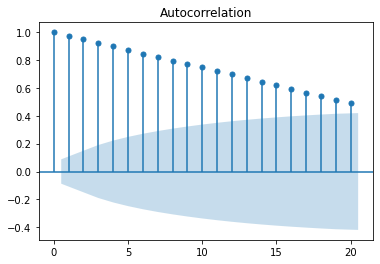

In [ ]:
sm.graphics.tsa.plot_acf(model.fit().resid, lags=20)
plt.show()

## Session 10 Questions

Stationary or Nonstationary?

In [12]:
#import data
df = pd.read_csv("Module3_data/module3_data_PE_Ratios.csv")
df.head()

# set time series for pe_ind
from datetime import datetime
import dateutil.parser
data = df.pe_ind
data.index = pd.date_range("1954-02-01", periods = len(df['pe_ind']), freq = "M")
data = data[data.index > dateutil.parser.parse("2000-01-01")]
data.head()

2000-01-31    16.4949
2000-02-29    17.2608
2000-03-31    14.4154
2000-04-30    13.4247
2000-05-31    12.7792
Freq: M, Name: pe_ind, dtype: float64

In [19]:
# ADF test
import statsmodels.api as sm
#with contants
test_1 = sm.tsa.stattools.adfuller(data,regression='c')
#with time trend and constant
test_2 = sm.tsa.stattools.adfuller(data,regression='ct')

In [21]:
print('ADF test')
print('-------')
print('With constant: %f ' % test_1[1] )
print('With constant and time trend: %f ' % test_2[1] )

ADF test
-------
With constant: 0.057448 
With constant and time trend: 0.144580 


##### Alternative with another package!

In [25]:
import arch.data.default
from arch.unitroot import ADF

adf_c = ADF(data)
adf_ct = ADF(data,trend = 'ct')
print(adf_c.summary().as_text())
print(adf_ct.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.806
P-value                         0.057
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.957
P-value                         0.145
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [27]:
from arch.unitroot import PhillipsPerron
pp_c = PhillipsPerron(data)
pp_ct = PhillipsPerron(data,trend='ct')
print(pp_c.summary().as_text())
print(pp_ct.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.956
P-value                         0.039
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.107
P-value                         0.104
Lags                               14
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### Question 3.40`

Since the time trend is not significant (information given in the question), we look at only the test withou time trend, and both have p-values lower than 0.10, therefore we will fail to reject the unit root hypothesesm, meaning that the series are **stationary**.





#### Question 3.41

Using the KPSS test , we are testing for stationarity, since from the values below we fail to reject the null hypothesis the series is **stationary.** 

In [28]:
from arch.unitroot import KPSS
kpss = KPSS(data)
print(kpss.summary().as_text())


    KPSS Stationarity Test Results   
Test Statistic                  0.296
P-value                         0.139
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
